In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

image_dir = '/content/drive/MyDrive/Colab Notebooks/Images'
for filename in os.listdir(image_dir):
    if filename.endswith(('.jpg', '.png', '.jpeg')): # Filter for image files
        print(filename)

half_ripe_tomato.jpg
ripe_banana.jpg
ripe_tomato.jpg
unripe_banana.jpg
unripe_tomato.jpg
crack_1.jpg
fabric_3.jpg
metal.jpg
tablet.png
car_part.jpg
dry_solder.jpg
kitkat_correct_template.jpg
kitkat_false_logo.jpg
defected_bottle.jpg


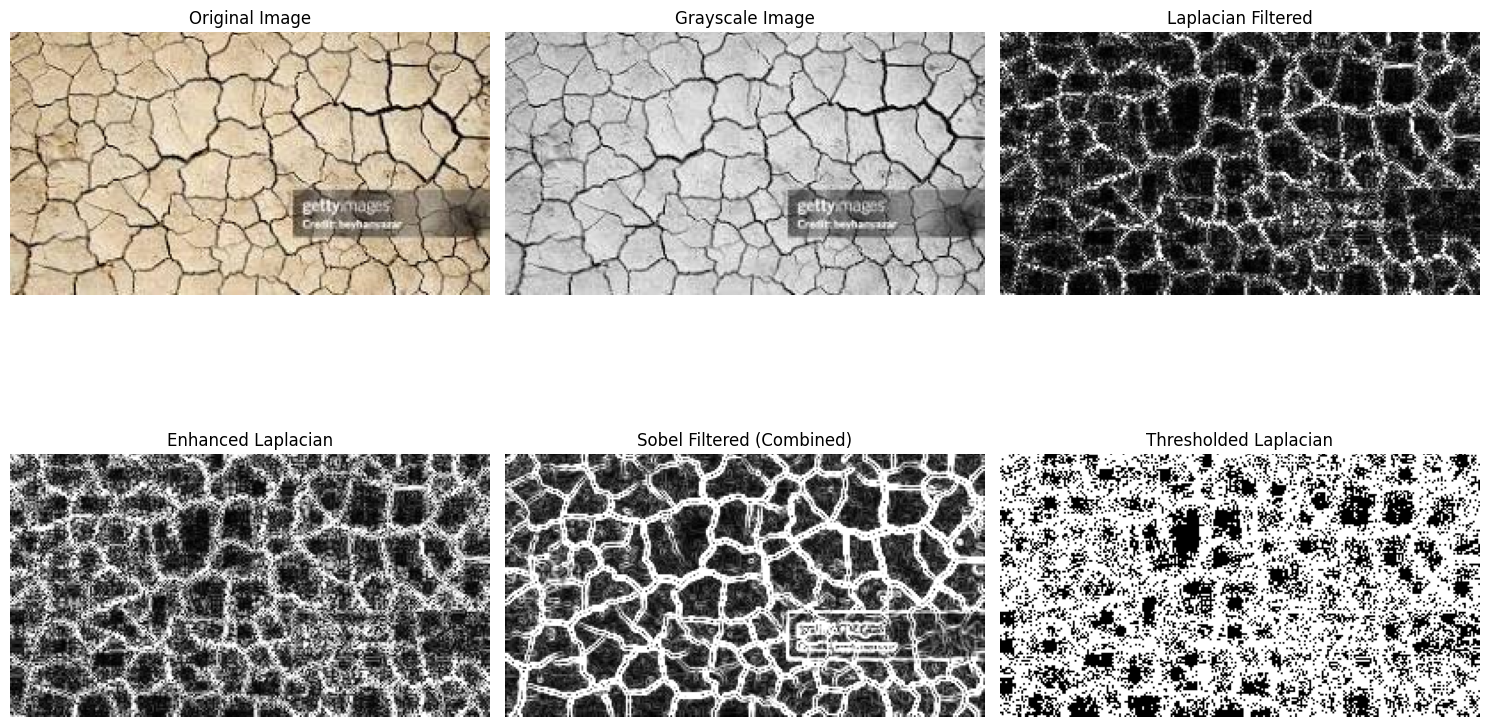

In [ ]:
# 2) Implement Sobel, Canny, and Laplacian edge detectors on bridge/concrete images to detect cracks.
# Compare their effectiveness
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_path = '/content/drive/MyDrive/Colab Notebooks/Images/crack_1.jpg'
img = cv2.imread(image_path)
if img is None:
    print(f"Error: Failed to load image from {image_path}")
else:

    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    laplacian = cv2.Laplacian(gray_img, cv2.CV_64F)
    # Convert back to uint8 for display
    laplacian_8bit = cv2.convertScaleAbs(laplacian)

    sobelx = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=3)
    sobel_combined = cv2.magnitude(sobelx, sobely)
    sobel_combined_8bit = cv2.convertScaleAbs(sobel_combined)

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    enhanced_laplacian = clahe.apply(laplacian_8bit)
    enhanced_sobel = clahe.apply(sobel_combined_8bit)

    _, thresholded_laplacian = cv2.threshold(enhanced_laplacian, 50, 255, cv2.THRESH_BINARY)
    _, thresholded_sobel = cv2.threshold(enhanced_sobel, 50, 255, cv2.THRESH_BINARY)


    # Visualize the results
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 3, 1), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 3, 2), plt.imshow(gray_img, cmap='gray'), plt.title('Grayscale Image')
    plt.axis('off')

    plt.subplot(2, 3, 3), plt.imshow(laplacian_8bit, cmap='gray'), plt.title('Laplacian Filtered')
    plt.axis('off')

    plt.subplot(2, 3, 4), plt.imshow(enhanced_laplacian, cmap='gray'), plt.title('Enhanced Laplacian')
    plt.axis('off')

    plt.subplot(2, 3, 5), plt.imshow(sobel_combined_8bit, cmap='gray'), plt.title('Sobel Filtered (Combined)')
    plt.axis('off')

    plt.subplot(2, 3, 6), plt.imshow(thresholded_laplacian, cmap='gray'), plt.title('Thresholded Laplacian')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


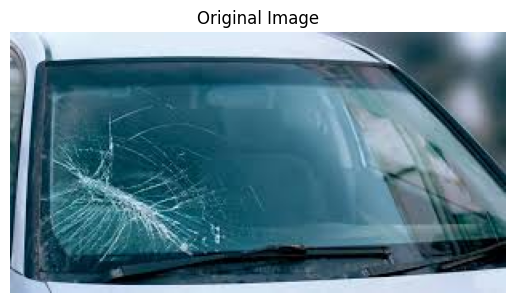

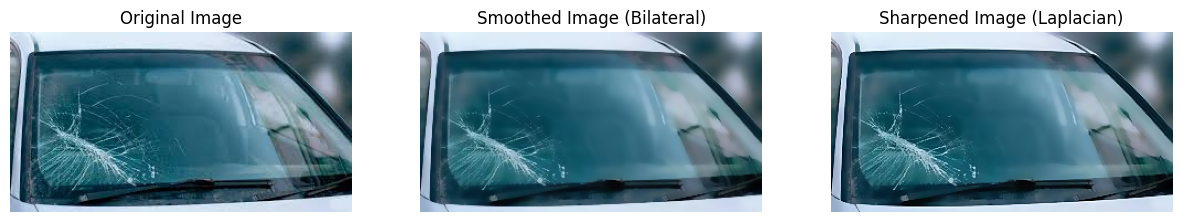

In [ ]:
# 1) Apply spatial filtering to enhance the surface of an automotive part image and highlight scratches or dents.
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Images/car_part.jpg')

if image is None:
    print(f"Error: Failed to load image from '/content/drive/MyDrive/Colab Notebooks/Images/car_part.jpg'")
else:
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')
    plt.show()
    smoothed_image = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)

    laplacian_kernel = np.array([[0, 1, 0],
                                 [1, -5, 1],
                                 [0, 1, 0]])

    kernel_sharpen = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])

    sharpened_image = cv2.filter2D(smoothed_image, -1, laplacian_kernel)
    blurred = cv2.GaussianBlur(smoothed_image,(5,5),0)
    sharpened_image = cv2.addWeighted(smoothed_image, 1.5, blurred, -0.5, 0)
    # Display the results
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(smoothed_image, cv2.COLOR_BGR2RGB))
    plt.title("Smoothed Image (Bilateral)")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
    plt.title("Sharpened Image (Laplacian)")
    plt.axis('off')

    plt.show()

Isolating defects in: /content/drive/MyDrive/Colab Notebooks/Images/fabric_3.jpg


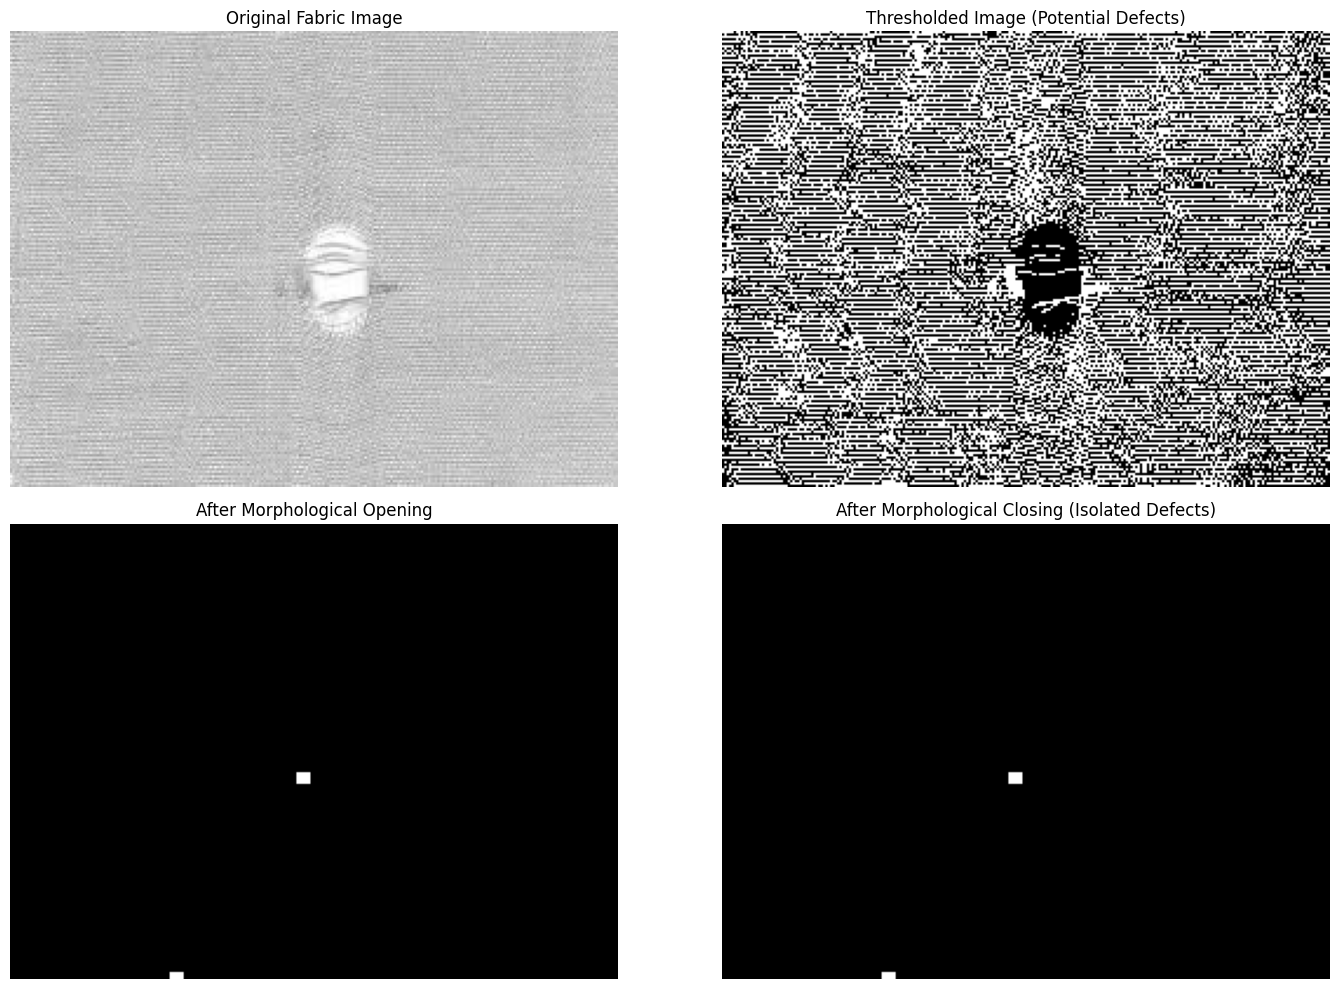

In [ ]:
# 3) Use morphological operations (opening/closing) to isolate defective regions
# in a fabric image
import cv2
import numpy as np
from matplotlib import pyplot as plt

def isolate_defects_with_morphology(image_path):
    img = cv2.imread(image_path)

    if img is None:
        print(f"Error: Failed to load image from {image_path}")
        return

    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, binary_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    kernel = np.ones((5, 5), np.uint8) # 5x5 square kernel
    opened_img = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, kernel)
    closed_img = cv2.morphologyEx(opened_img, cv2.MORPH_CLOSE, kernel)
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 2, 1), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Fabric Image'), plt.axis('off')

    plt.subplot(2, 2, 2), plt.imshow(binary_img, cmap='gray')
    plt.title('Thresholded Image (Potential Defects)'), plt.axis('off')

    plt.subplot(2, 2, 3), plt.imshow(opened_img, cmap='gray')
    plt.title('After Morphological Opening'), plt.axis('off')

    plt.subplot(2, 2, 4), plt.imshow(closed_img, cmap='gray')
    plt.title('After Morphological Closing (Isolated Defects)'), plt.axis('off')

    plt.tight_layout()
    plt.show()

fabric_defect_image_path = '/content/drive/MyDrive/Colab Notebooks/Images/fabric_3.jpg'
print(f"Isolating defects in: {fabric_defect_image_path}")
isolate_defects_with_morphology(fabric_defect_image_path)


Applying thresholding methods to: /content/drive/MyDrive/Colab Notebooks/Images/metal.jpg


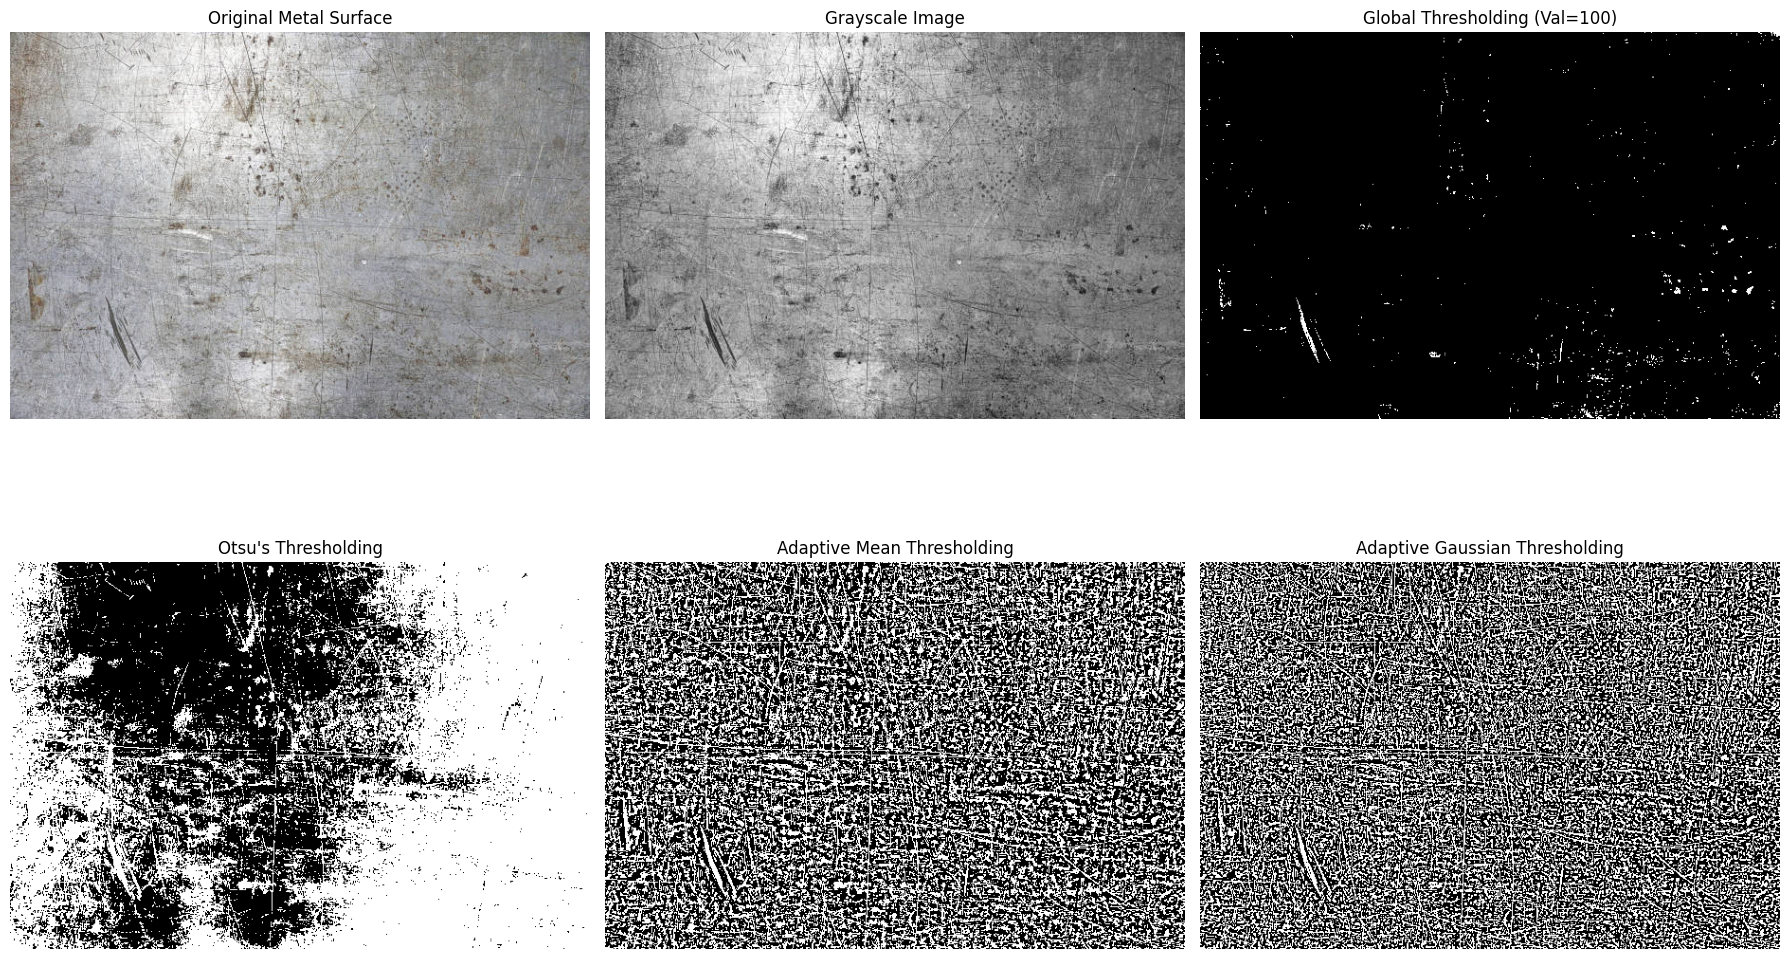

In [ ]:
# 4) Apply global, adaptive, and Otsu thresholding on metal surface images to separate defective vs. non-defective regions.
# Provide comparative results
import cv2
import numpy as np
from matplotlib import pyplot as plt

def apply_thresholding_methods(image_path):
    """
    Loads a metal surface image, converts it into grayscale, and applies
    global, Otsu, and adaptive thresholding to segment defective areas.
    Compares results.
    """
    img = cv2.imread(image_path)

    if img is None:
        print(f"Error: Could not load image from {image_path}")
        return


    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


    global_thresh_value = 100
    _, global_thresh = cv2.threshold(gray_img, global_thresh_value, 255, cv2.THRESH_BINARY_INV)

    _, otsu_thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    adaptive_thresh_mean = cv2.adaptiveThreshold(gray_img, 255,
    cv2.ADAPTIVE_THRESH_MEAN_C,
    cv2.THRESH_BINARY_INV, 11, 2)

    adaptive_thresh_gaussian = cv2.adaptiveThreshold(gray_img, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV, 11, 2)

    plt.figure(figsize=(18, 12))

    plt.subplot(2, 3, 1), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Metal Surface'), plt.axis('off')

    plt.subplot(2, 3, 2), plt.imshow(gray_img, cmap='gray')
    plt.title('Grayscale Image'), plt.axis('off')

    plt.subplot(2, 3, 3), plt.imshow(global_thresh, cmap='gray')
    plt.title(f'Global Thresholding (Val={global_thresh_value})'), plt.axis('off')

    plt.subplot(2, 3, 4), plt.imshow(otsu_thresh, cmap='gray')
    plt.title("Otsu's Thresholding"), plt.axis('off')

    plt.subplot(2, 3, 5), plt.imshow(adaptive_thresh_mean, cmap='gray')
    plt.title('Adaptive Mean Thresholding'), plt.axis('off')

    plt.subplot(2, 3, 6), plt.imshow(adaptive_thresh_gaussian, cmap='gray')
    plt.title('Adaptive Gaussian Thresholding'), plt.axis('off')

    plt.tight_layout()
    plt.show()


metal_image_path = '/content/drive/MyDrive/Colab Notebooks/Images/metal.jpg' # Sample defect image
# metal_image_path = 'mvtec_ad/metal_nut/train/good/000.png' # Good sample for comparison

print(f"Applying thresholding methods to: {metal_image_path}")
apply_thresholding_methods(metal_image_path)


In [ ]:
# 5) Develop a color-based thresholding method (HSV space) to classify fruits as ripe or unripe.
# Test on at least 5 samples.
import cv2
import numpy as np

def classify_fruit_ripeness(image_path, fruit_type):
    img = cv2.imread(image_path)
    if img is None:
        return "Error: Could not load image."

    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    if fruit_type == 'banana':

        lower_unripe = np.array([20, 100, 100])
        upper_unripe = np.array([40, 255, 255])

        lower_ripe = np.array([25, 100, 100])
        upper_ripe = np.array([35, 255, 255])
    elif fruit_type == 'tomato':

        lower_unripe = np.array([40, 50, 50])
        upper_unripe = np.array([80, 255, 255])

        lower_ripe = np.array([0, 100, 100])
        upper_ripe = np.array([10, 255, 255])
    else:
        return "Unknown fruit type."


    mask_unripe = cv2.inRange(hsv_img, lower_unripe, upper_unripe)
    mask_ripe = cv2.inRange(hsv_img, lower_ripe, upper_ripe)


    unripe_pixels = np.sum(mask_unripe > 0)
    ripe_pixels = np.sum(mask_ripe > 0)
    total_pixels = img.shape[0] * img.shape[1]

    unripe_percentage = (unripe_pixels / total_pixels) * 100
    ripe_percentage = (ripe_pixels / total_pixels) * 100

    if ripe_percentage > unripe_percentage and ripe_percentage > 5:
        return "Ripe"
    elif unripe_percentage > ripe_percentage and unripe_percentage > 5:
        return "Unripe"
    else:
        return "Unknown"




result1 = classify_fruit_ripeness('/content/drive/MyDrive/Colab Notebooks/Images/unripe_banana.jpg', 'banana')
print(f"Sample 1 (Unripe Banana): {result1}")

result2 = classify_fruit_ripeness('/content/drive/MyDrive/Colab Notebooks/Images/ripe_banana.jpg', 'banana')
print(f"Sample 2 (Ripe Banana): {result2}")

result3 = classify_fruit_ripeness('/content/drive/MyDrive/Colab Notebooks/Images/unripe_tomato.jpg', 'tomato')
print(f"Sample 3 (Unripe Tomato): {result3}")


result4 = classify_fruit_ripeness('/content/drive/MyDrive/Colab Notebooks/Images/ripe_tomato.jpg', 'tomato')
print(f"Sample 4 (Ripe Tomato): {result4}")

result5 = classify_fruit_ripeness('/content/drive/MyDrive/Colab Notebooks/Images/half_ripe_tomato.jpg', 'tomato')
print(f"Sample 5 (Partially Ripe Tomato): {result5}")

Sample 1 (Unripe Banana): Unripe
Sample 2 (Ripe Banana): Unripe
Sample 3 (Unripe Tomato): Unripe
Sample 4 (Ripe Tomato): Ripe
Sample 5 (Partially Ripe Tomato): Unripe


Detected 15 extra object(s).
Detected 31 potential defects.


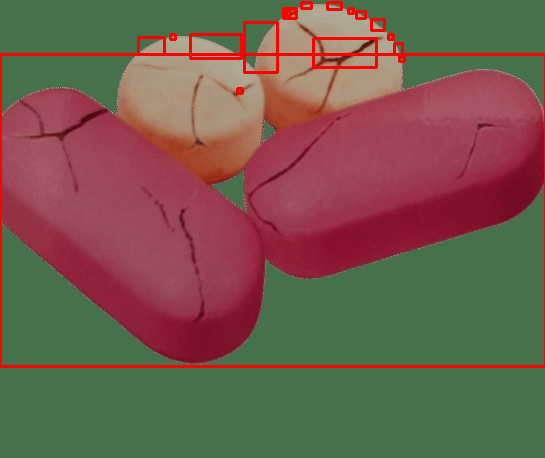

In [13]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def detect_tablet_defects(image_path, reference_component_areas, tolerance=0.3):
    """
    Detects missing, broken, or extra objects on a tablet image using connected components analysis.

    Args:
        image_path (str): Path to the tablet image.
        reference_component_areas (list): A list of expected areas for each component
                                         in a defect-free tablet.
        tolerance (float): The allowed percentage deviation from the reference area
                           to consider a component as "normal."

    Returns:
        numpy.ndarray: The image with bounding boxes drawn around detected defects.
    """
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not load image from {image_path}")
        return None

    # Convert to HSV for better color-based segmentation
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # Threshold to isolate tablets (adjust based on tablet color, e.g., pinkish hue)
    lower_pink = np.array([130, 50, 50])
    upper_pink = np.array([180, 255, 255])
    mask = cv2.inRange(hsv, lower_pink, upper_pink)
    blurred = cv2.GaussianBlur(mask, (5, 5), 0)
    _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY)

    # Perform connected components analysis
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh, 8, cv2.CV_32S)

    output_image = image.copy()
    defect_count = 0

    # Find contours for internal crack detection
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Iterate through each detected component (excluding the background label 0)
    for i in range(1, num_labels):
        x = stats[i, cv2.CC_STAT_LEFT]
        y = stats[i, cv2.CC_STAT_TOP]
        w = stats[i, cv2.CC_STAT_WIDTH]
        h = stats[i, cv2.CC_STAT_HEIGHT]
        area = stats[i, cv2.CC_STAT_AREA]

        # Check for missing or broken components based on area deviation
        is_defect = True
        for ref_area in reference_component_areas:
            if abs(area - ref_area) / ref_area < tolerance:
                is_defect = False
                break

        # Check for internal cracks using contour analysis within the component
        component_mask = np.zeros_like(thresh)
        cv2.drawContours(component_mask, contours, i-1, 255, -1)  # Fill the contour
        internal_contours, _ = cv2.findContours(component_mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
        for internal_cnt in internal_contours:
            internal_area = cv2.contourArea(internal_cnt)
            if internal_area > 50 and internal_area < area * 0.5:  # Potential crack
                is_defect = True
                cv2.drawContours(output_image, [internal_cnt], -1, (0, 0, 255), 2)  # Red for cracks

        if is_defect or area < min(reference_component_areas) * 0.5:  # Small area indicates fragment
            cv2.rectangle(output_image, (x, y), (x + w, y + h), (0, 0, 255), 2)  # Red for defects
            defect_count += 1

    # Check for extra objects
    expected_components = len(reference_component_areas)
    detected_components = num_labels - 1
    if detected_components > expected_components:
        extra_count = detected_components - expected_components
        print(f"Detected {extra_count} extra object(s).")
        defect_count += extra_count
    elif detected_components < expected_components:
        print(f"Detected {expected_components - detected_components} missing object(s).")
        defect_count += (expected_components - detected_components)

    if defect_count == 0:
        print("No defects detected.")
    else:
        print(f"Detected {defect_count} potential defects.")

    return output_image

reference_areas = [5000]  # Example area (in pixels), adjust based on your image resolution


result_image = detect_tablet_defects('/content/drive/MyDrive/Colab Notebooks/Images/tablet.png', reference_areas, tolerance=0.3)

if result_image is not None:
    cv2_imshow(result_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


--- Solder Joint Analysis Statistics ---
Total joints detected: 67
Good joints: 32
Defective joints: 35
Percentage good: 47.76%
Percentage defective: 52.24%


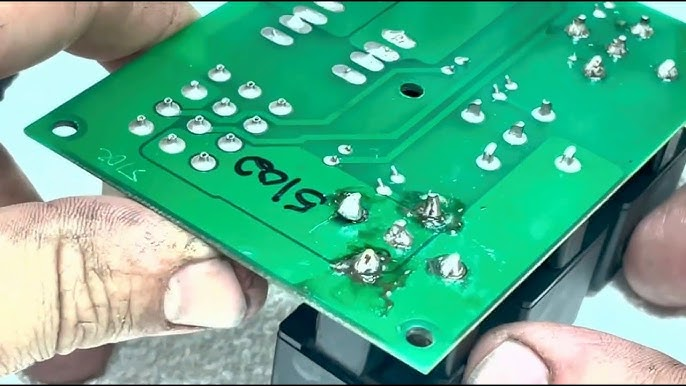

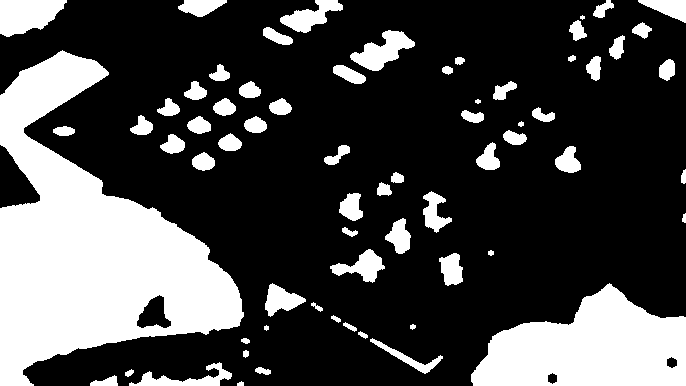

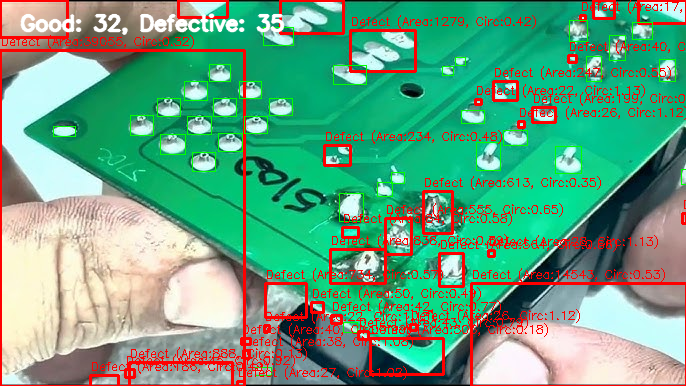

In [ ]:
# 7) Apply connected component labeling to count defective vs. good solder joints on PCB images.
# Provide statistics of the results
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

def analyze_solder_joints(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not open or find the image at {image_path}")
        return

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


    _, thresh = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY) # Adjust threshold value

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)

    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh, 8, cv2.CV_32S)

    output_img = img.copy()
    good_joints = 0
    defective_joints = 0

    for i in range(1, num_labels):
        x = stats[i, cv2.CC_STAT_LEFT]
        y = stats[i, cv2.CC_STAT_TOP]
        w = stats[i, cv2.CC_STAT_WIDTH]
        h = stats[i, cv2.CC_STAT_HEIGHT]
        area = stats[i, cv2.CC_STAT_AREA]

        min_solder_area = 50
        max_solder_area = 500
        min_circularity = 0.6 # Use perimeter and area to calculate circularity


        component_mask = (labels == i).astype(np.uint8) * 255
        contours, _ = cv2.findContours(component_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        circularity = 0
        if contours:
            perimeter = cv2.arcLength(contours[0], True)
            if perimeter > 0:
                circularity = 4 * np.pi * area / (perimeter * perimeter)

        # Classify based on heuristics
        if (min_solder_area < area < max_solder_area) and (circularity > min_circularity):
            good_joints += 1
            cv2.rectangle(output_img, (x, y), (x + w, y + h), (0, 255, 0), 1) # Green for good
        else:
            defective_joints += 1
            cv2.rectangle(output_img, (x, y), (x + w, y + h), (0, 0, 255), 2) # Red for defective
            cv2.putText(output_img, f"Defect (Area:{area:.0f}, Circ:{circularity:.2f})",
                        (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 0, 255), 1)

    total_joints = good_joints + defective_joints

    print("\n--- Solder Joint Analysis Statistics ---")
    print(f"Total joints detected: {total_joints}")
    print(f"Good joints: {good_joints}")
    print(f"Defective joints: {defective_joints}")
    if total_joints > 0:
        print(f"Percentage good: {(good_joints / total_joints * 100):.2f}%")
        print(f"Percentage defective: {(defective_joints / total_joints * 100):.2f}%")
    else:
        print("No joints detected.")

    cv2.putText(output_img, f"Good: {good_joints}, Defective: {defective_joints}",
                (20, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)

    cv2_imshow(img)
    cv2_imshow(thresh)
    cv2_imshow(output_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


analyze_solder_joints('/content/drive/MyDrive/Colab Notebooks/Images/dry_solder.jpg')

--- ORB Feature Matching ---
ORB: Found 27 good matches.
ORB: Logo detected and outlined in scene.


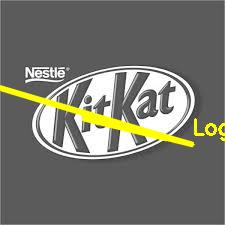

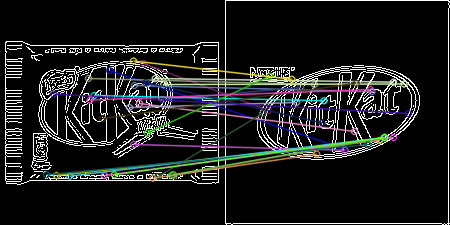


--- Template Matching ---
Template Matching: No strong match found (Max score: 0.11).


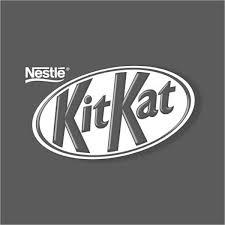

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

def detect_logo_features(template_path, scene_path):
    # Load images
    template = cv2.imread(template_path, cv2.IMREAD_GRAYSCALE)
    scene = cv2.imread(scene_path, cv2.IMREAD_GRAYSCALE)

    if template is None or scene is None:
        print(f"Error: Could not open template or scene image.")
        return

    # Preprocess: Apply Canny edge detection to focus on logo outlines
    template_edges = cv2.Canny(template, 100, 200)
    scene_edges = cv2.Canny(scene, 100, 200)

    # --- ORB Feature Matching ---
    print("--- ORB Feature Matching ---")
    orb = cv2.ORB_create(nfeatures=1000)  # Increase keypoints
    kp1, des1 = orb.detectAndCompute(template_edges, None)
    kp2, des2 = orb.detectAndCompute(scene_edges, None)

    if des1 is not None and des2 is not None and len(des1) > 0 and len(des2) > 0:
        # Use FLANN matcher for better matching
        FLANN_INDEX_LSH = 6
        index_params = dict(algorithm=FLANN_INDEX_LSH, table_number=6, key_size=12, multi_probe_level=1)
        search_params = dict(checks=50)
        flann = cv2.FlannBasedMatcher(index_params, search_params)
        matches = flann.knnMatch(des1, des2, k=2)

        # Apply ratio test
        good_matches = []
        for m, n in matches:
            if m.distance < 0.75 * n.distance:
                good_matches.append(m)

        num_matches_to_draw = min(50, len(good_matches))
        img_matches_orb = cv2.drawMatches(template_edges, kp1, scene_edges, kp2, good_matches[:num_matches_to_draw], None, flags=2)

        print(f"ORB: Found {len(good_matches)} good matches.")
        if len(good_matches) > 15:  # Lowered threshold for homography
            src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
            dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
            M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 3.0)  # Lowered RANSAC threshold

            if M is not None:
                h, w = template_edges.shape
                pts = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1, 2)
                dst = cv2.perspectiveTransform(pts, M)

                scene_display = cv2.cvtColor(scene, cv2.COLOR_GRAY2BGR)
                cv2.polylines(scene_display, [np.int32(dst)], True, (0, 255, 255), 3, cv2.LINE_AA)
                cv2.putText(scene_display, "Logo (ORB)", (np.int32(dst[0][0][0]), np.int32(dst[0][0][1] - 10)),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 255), 2)
                print("ORB: Logo detected and outlined in scene.")
                cv2_imshow(scene_display)
            else:
                print("ORB: Homography estimation failed.")
        else:
            print("ORB: Not enough good matches to find homography.")
        cv2_imshow(img_matches_orb)
    else:
        print("ORB: Could not detect enough keypoints/descriptors.")

    # --- Template Matching ---
    print("\n--- Template Matching ---")
    scene_color = cv2.cvtColor(scene, cv2.COLOR_GRAY2BGR)

    res = cv2.matchTemplate(scene_edges, template_edges, cv2.TM_CCORR_NORMED)  # Use normalized correlation
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # Dynamic threshold based on max value
    threshold = max(0.7, max_val - 0.1)  # Adjust threshold dynamically
    if max_val >= threshold:
        top_left = max_loc
        h, w = template_edges.shape
        bottom_right = (top_left[0] + w, top_left[1] + h)
        cv2.rectangle(scene_color, top_left, bottom_right, (0, 0, 255), 3)
        cv2.putText(scene_color, f"Logo (TM, Score:{max_val:.2f})", (top_left[0], top_left[1] - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        print(f"Template Matching: Logo detected with score {max_val:.2f} at {top_left}.")
    else:
        print(f"Template Matching: No strong match found (Max score: {max_val:.2f}).")

    cv2_imshow(scene_color)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Example usage
logo_template = '/content/drive/MyDrive/Colab Notebooks/Images/kitkat_correct_template.jpg'
product_scene = '/content/drive/MyDrive/Colab Notebooks/Images/kitkat_false_logo.jpg'
detect_logo_features(logo_template, product_scene)

Detected 0 potential cracks.
Detected 1 potential missing parts.


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
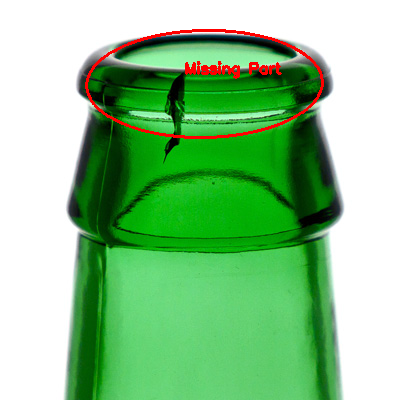

In [8]:
# 9) Design a pipeline using edge detection + morphology to detect cracks or missing parts in glass bottle images.
# Show defect localization.
import cv2
import numpy as np

def detect_bottle_defects(image_path, output_path):
    # Load the image
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError("Image not found or invalid path.")

    # Preprocessing: Grayscale and blur
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Edge detection: Canny with adjusted thresholds
    edges = cv2.Canny(blurred, 20, 80)

    # Morphology: Closing to fill gaps, aggressive opening to remove noise
    kernel = np.ones((5, 5), np.uint8)
    closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel, iterations=2)
    opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel, iterations=2)  # Increased to remove small noise

    # Find contours
    contours, hierarchy = cv2.findContours(opened, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Annotated image
    annotated = img.copy()

    # Detect defects
    cracks = []  # Positions for cracks
    missing_parts = []  # Positions for missing parts

    for i, cnt in enumerate(contours):
        # Compute bounding rect and aspect ratio
        x, y, w, h = cv2.boundingRect(cnt)
        aspect_ratio = float(w) / h if h != 0 else 0
        area = cv2.contourArea(cnt)

        # Heuristic for cracks: Thin, elongated contours
        if area > 50 and area < 600 and (aspect_ratio > 3 or aspect_ratio < 0.3):
            cracks.append((x, y, w, h))
            cv2.rectangle(annotated, (x, y), (x + w, y + h), (0, 0, 255), 2)  # Red box for cracks
            cv2.putText(annotated, "Crack", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

        # Heuristic for missing parts: Significant irregularities, filter small contours
        if area > 150 and hierarchy[0][i][3] != -1 and len(cnt) >= 5:  # Increased area threshold
            ellipse = cv2.fitEllipse(cnt)
            center, axes, angle = ellipse
            major, minor = max(axes), min(axes)
            if minor / major < 0.7:  # Stricter roundness check
                missing_parts.append(ellipse)
                cv2.ellipse(annotated, ellipse, (255, 0, 0), 2)  # Blue ellipse for missing parts
                cv2.putText(annotated, "Missing Part", (int(center[0]) - 20, int(center[1]) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # If no missing parts, check for largest non-circular contour as primary defect
    if not missing_parts and contours:
        largest_contour = max(contours, key=cv2.contourArea)
        if cv2.contourArea(largest_contour) > 150:
            ellipse = cv2.fitEllipse(largest_contour)
            center, axes, angle = ellipse
            major, minor = max(axes), min(axes)
            if minor / major < 0.7:
                missing_parts.append(ellipse)
                cv2.ellipse(annotated, ellipse, (255, 0, 0), 2)
                cv2.putText(annotated, "Missing Part", (int(center[0]) - 20, int(center[1]) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Save annotated output
    cv2.imwrite(output_path, annotated)

    # Summary
    print(f"Detected {len(cracks)} potential cracks.")
    print(f"Detected {len(missing_parts)} potential missing parts.")

    return annotated

# Example usage
detect_bottle_defects('/content/drive/MyDrive/Colab Notebooks/Images/defected_bottle.jpg', '/content/drive/MyDrive/Colab Notebooks/Images/annotated_bottle.jpg')

Detected 32 potential broken tracks.
Detected 4 potential missing solder points.


array([[[  0,   0,   3],
        [  0,   0,   3],
        [  0,   0,   3],
        ...,
        [  0,   0, 255],
        [255,   0,   0],
        [255,   0,   0]],

       [[120, 130, 140],
        [118, 130, 140],
        [120, 130, 140],
        ...,
        [  0,   0, 255],
        [255,   0,   0],
        [255,   0,   0]],

       [[209, 229, 254],
        [207, 229, 254],
        [209, 230, 252],
        ...,
        [  0,   0, 255],
        [255,   0,   0],
        [255,   0,   0]],

       ...,

       [[246, 247, 221],
        [246, 247, 221],
        [246, 247, 221],
        ...,
        [182, 194, 218],
        [195, 207, 231],
        [195, 208, 230]],

       [[148, 151, 136],
        [148, 151, 136],
        [147, 149, 137],
        ...,
        [119, 125, 136],
        [119, 125, 136],
        [119, 126, 135]],

       [[  0,   3,   0],
        [  0,   3,   0],
        [  0,   2,   0],
        ...,
        [  0,   0,   4],
        [  0,   0,   3],
        [  0,   0,   3]]], dtype=uint8)
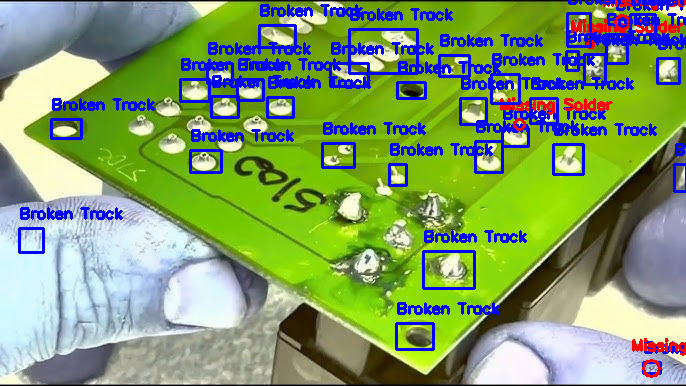

In [11]:
# 10) Perform defect detection on PCB images using edge detection and morphology to identify broken tracks or missing solder points.
# Provide annotated outputs.
import cv2
import numpy as np

def detect_pcb_defects(image_path, output_path):
    # Load the image
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError("Image not found or invalid path.")

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Edge detection using Canny
    edges = cv2.Canny(blurred, 50, 150)

    # Morphology: Dilation to connect close edges, then erosion to refine
    kernel = np.ones((3, 3), np.uint8)
    dilated = cv2.dilate(edges, kernel, iterations=2)
    eroded = cv2.erode(dilated, kernel, iterations=1)

    # Find contours for potential tracks and solder points
    contours, _ = cv2.findContours(eroded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Annotated image (copy of original)
    annotated = img.copy()

    # Detect defects (simplified logic)
    broken_tracks = []  # Store positions of potential broken tracks
    missing_solders = []  # Store positions of potential missing solders

    for cnt in contours:
        # Approximate contour to polygon
        approx = cv2.approxPolyDP(cnt, 0.02 * cv2.arcLength(cnt, True), closed=False)

        # Heuristic for broken tracks: Short, linear contours (potential fragments)
        arc_len = cv2.arcLength(cnt, False)
        if 30 < arc_len < 300:  # Widened range to catch more tracks
            x, y, w, h = cv2.boundingRect(cnt)
            broken_tracks.append((x, y, w, h))
            cv2.rectangle(annotated, (x, y), (x + w, y + h), (0, 0, 255), 2)  # Red box for broken tracks
            cv2.putText(annotated, "Broken Track", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

        # Heuristic for solder points: Small, circular contours
        if cv2.contourArea(cnt) < 200 and len(approx) > 5:  # Increased area threshold
            (x, y), radius = cv2.minEnclosingCircle(cnt)
            center = (int(x), int(y))
            radius = int(radius)
            # Flag as missing if area is significantly smaller than typical solder
            if cv2.contourArea(cnt) < 100 or (radius < 5 and cv2.contourArea(cnt) < 150):  # Adjusted for missing detection
                missing_solders.append(center)
                cv2.circle(annotated, center, radius, (255, 0, 0), 2)  # Blue circle for missing solder
                cv2.putText(annotated, "Missing Solder", (center[0] - 20, center[1] - radius - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Save annotated output
    cv2.imwrite(output_path, annotated)

    # Print summary (for console)
    print(f"Detected {len(broken_tracks)} potential broken tracks.")
    print(f"Detected {len(missing_solders)} potential missing solder points.")

    return annotated
detect_pcb_defects('/content/drive/MyDrive/Colab Notebooks/Images/dry_solder.jpg', 'path/to/annotated_output.jpg')